In [7]:
#importando as libs
import os
import scipy.stats
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = 'white')#deixa configurado que todos os plots terão esse estilo definido
%matplotlib inline 
# essa ultima linha só funciona no jupyter

In [5]:
#importação do banco de dados
clean_data_path="bancodados/autos.csv"
df = pd.read_csv(clean_data_path,encoding="latin-1")

In [17]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-23 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-04 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5


Text(0.5, 1.0, 'Distribuição de Veículos com base no Ano de Registro')

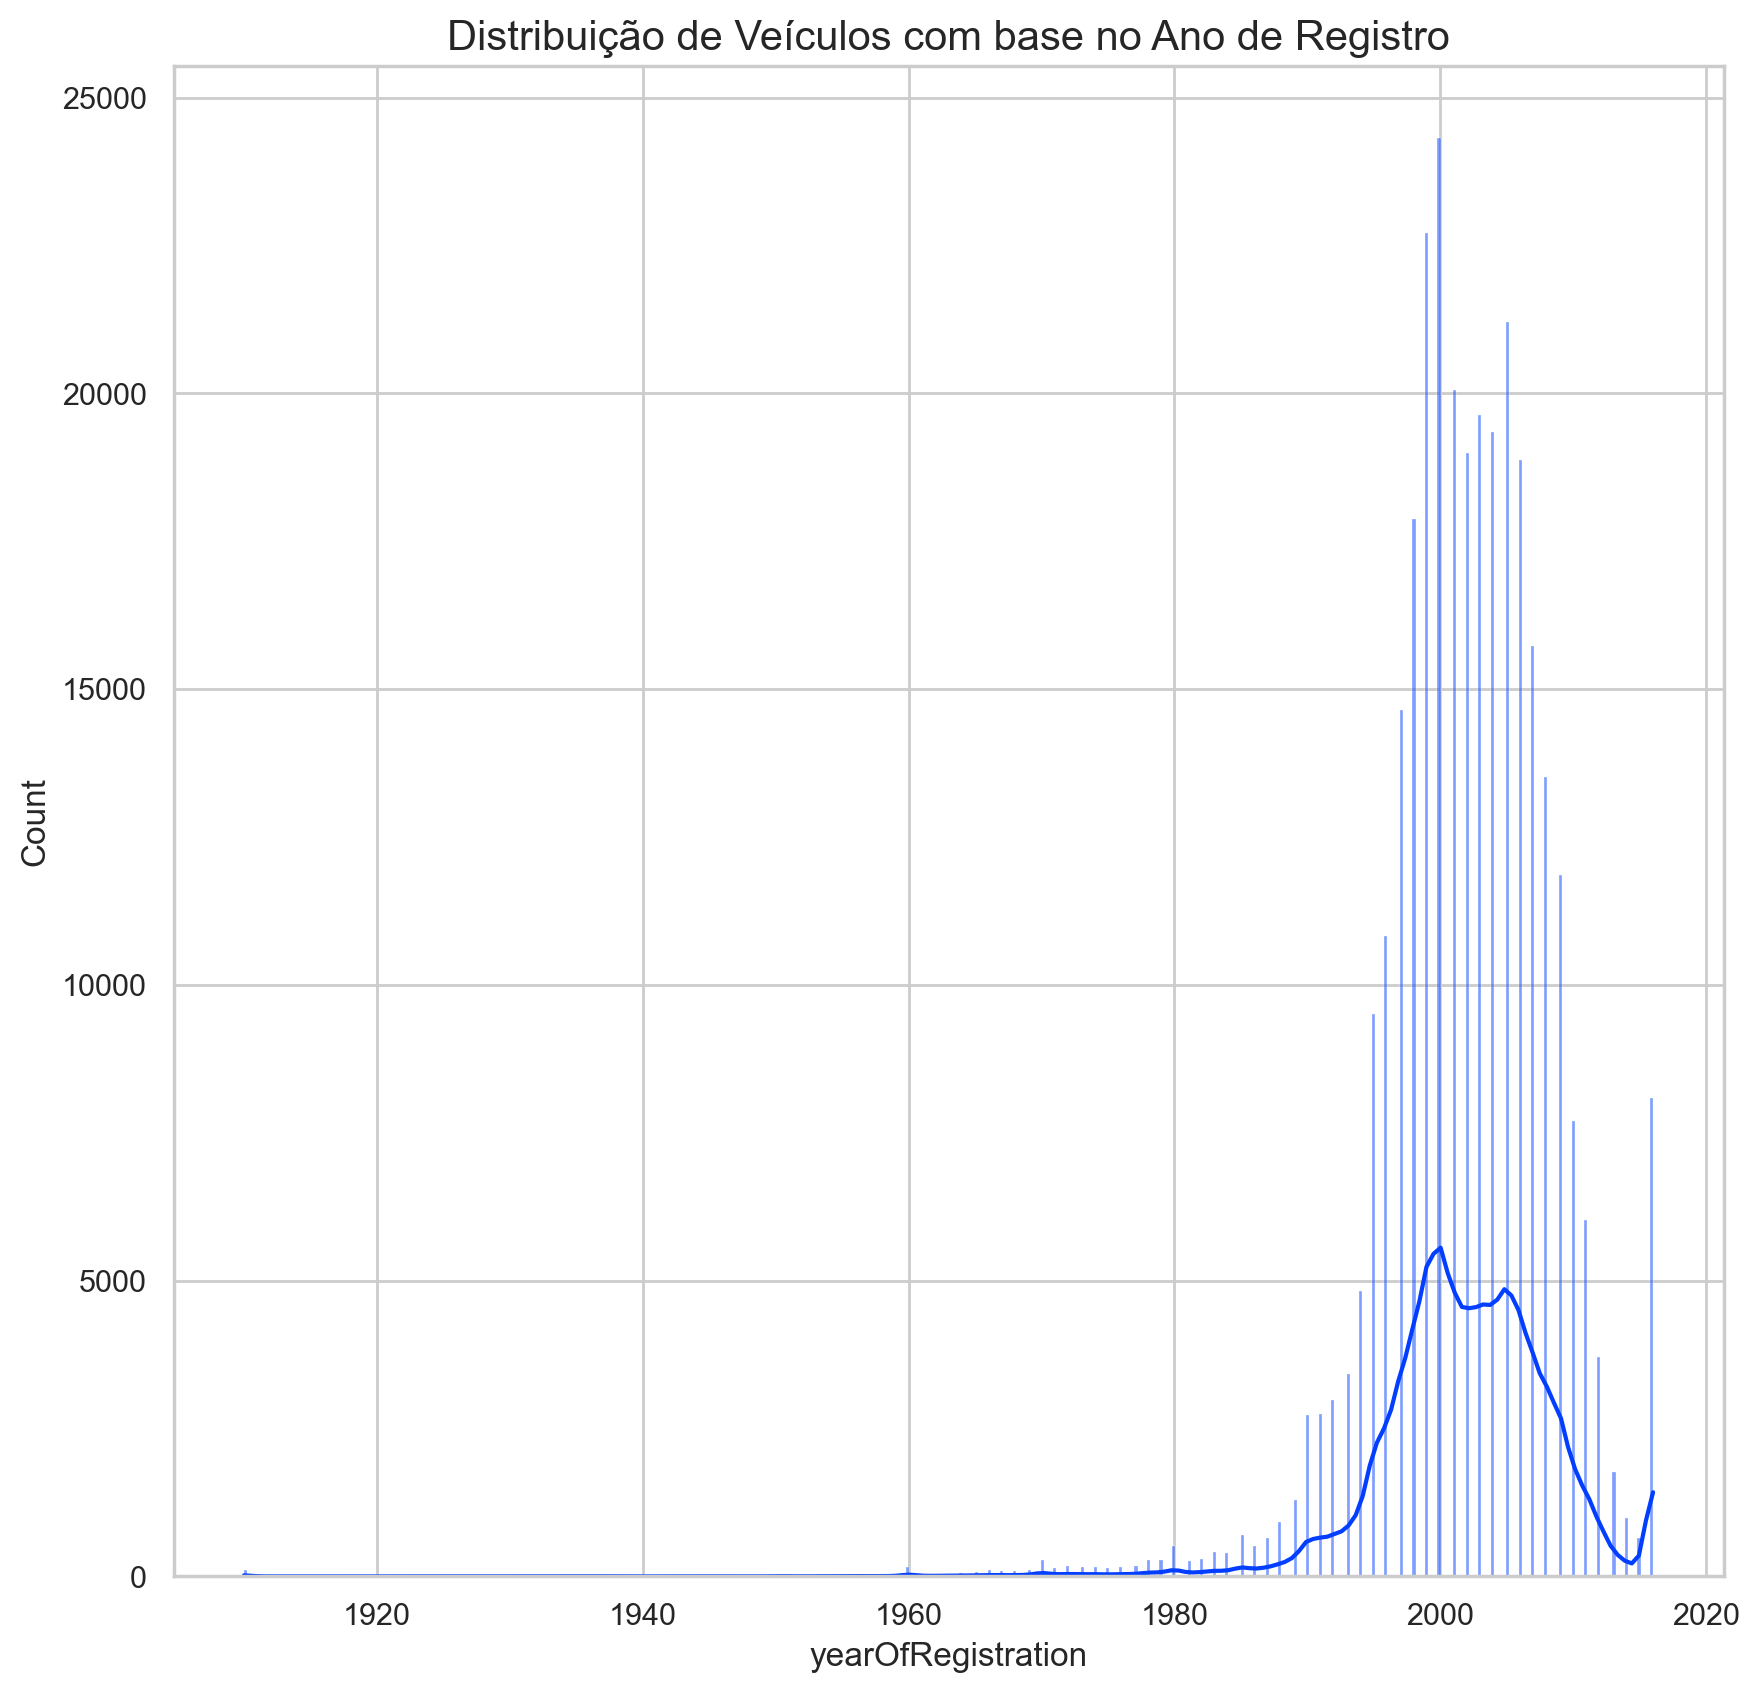

In [118]:
#criando uma visualização da distribuição com base no ano de Registro dos veiculos
fig,ax=plt.subplots(figsize=(10,10),dpi=200)
sns.histplot(df["yearOfRegistration"],kde=True,ax=ax)
ax.set_title('Distribuição de Veículos com base no Ano de Registro', fontsize=15)

In [119]:
#capturando a imagem e salvando na mesma pasta do notebook
fig=df2.get_figure()
fig.savefig("densidade.png")

Text(0, 0.5, 'Preço')

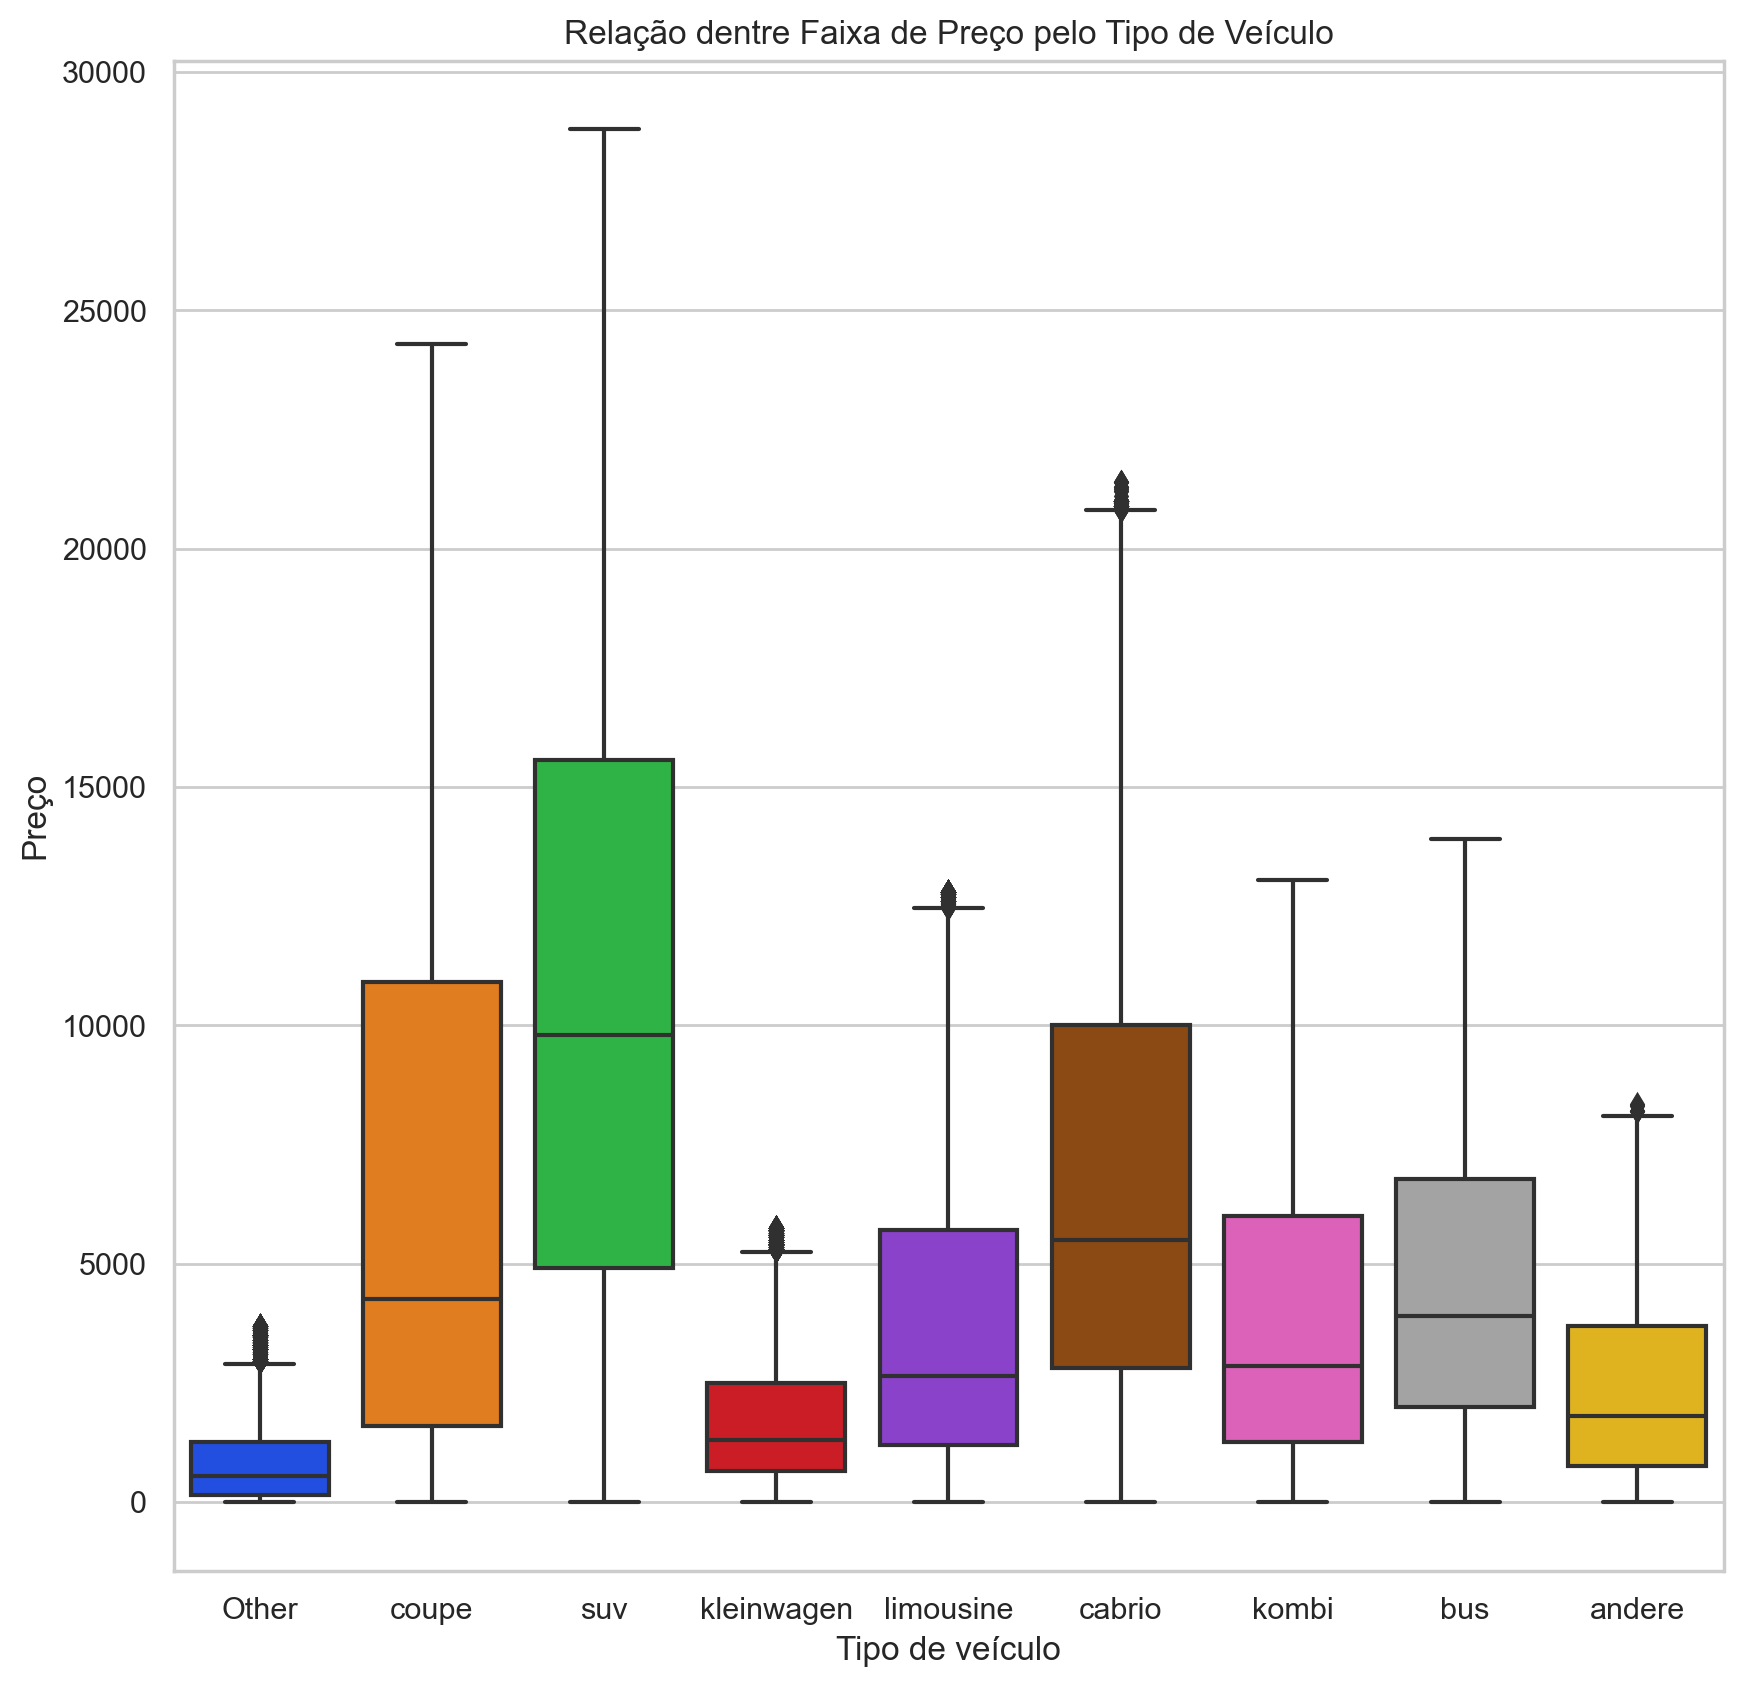

In [124]:
#criando um scatterplot da relação de faixa de preço pelo tipo de veiculo
plt.figure(figsize = (10,10), dpi=200)
sns.set_theme(style="whitegrid", palette="bright")
df3=sns.boxplot(data=df,
               x="vehicleType",
               y="price")
df3.set_title("Relação dentre Faixa de Preço pelo Tipo de Veículo")
df3.xaxis.set_label_text("Tipo de veículo")
df3.yaxis.set_label_text("Preço")

In [125]:
#capturando a imagem e salvando na mesma pasta do notebook
fig=df3.get_figure()
fig.savefig("boxplot_preço_tipo.png")

In [90]:
df['offerType'].value_counts()

Offer      313677
Request        10
Name: offerType, dtype: int64

In [103]:
offer.head()

0    Offer
1    Offer
2    Offer
3    Offer
4    Offer
Name: offerType, dtype: object

In [106]:
Ofertados=offer[offer == 'Offer']

In [107]:
Ofertados

0         Offer
1         Offer
2         Offer
3         Offer
4         Offer
          ...  
313682    Offer
313683    Offer
313684    Offer
313685    Offer
313686    Offer
Name: offerType, Length: 313677, dtype: object

In [108]:
df['Ofertados']= Ofertados

In [109]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld,Ofertados
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11,Offer
1,2016-03-23 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7,Offer
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,2016-04-04 12:47:46,2016,2016,March,March,22,12,12,4,Offer
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5,Offer
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5,Offer


<Figure size 2000x2000 with 0 Axes>

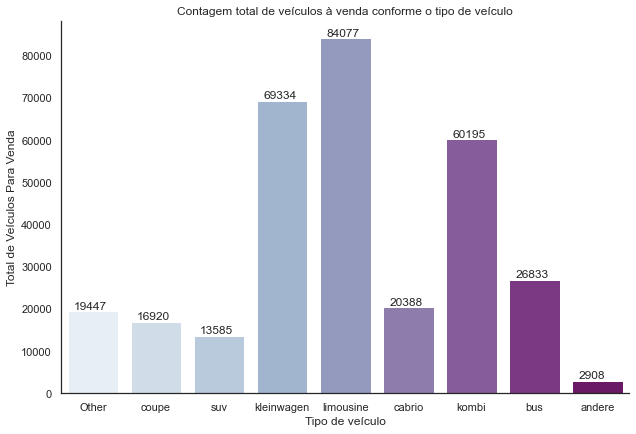

In [121]:
#elaborando um grafico de barras para a relação de veiculos a venda conforme o tipo 
plt.figure(figsize = (10,10), dpi=200)
sns.set_style("white")
df4 = sns.catplot(data=df,
                 x='vehicleType',
                 kind="count",
                 palette="BuPu",
                 height=6,
                 aspect=1.5)
df4.ax.set_title("Contagem total de veículos à venda conforme o tipo de veículo")
df4.ax.xaxis.set_label_text("Tipo de veículo")
df4.ax.yaxis.set_label_text("Total de Veículos Para Venda")

#colocando os numeros de carros ofertados por tipo no topo de cada barra
for p in df4.ax.patches:
    df4.ax.annotate((p.get_height()),(p.get_x()+0.1,p.get_height()+500))

In [127]:
#capturando a imagem e salvando na mesma pasta do notebook
df4.savefig("Barras oferta por marca.png")

Text(0, 0.5, 'Preço')

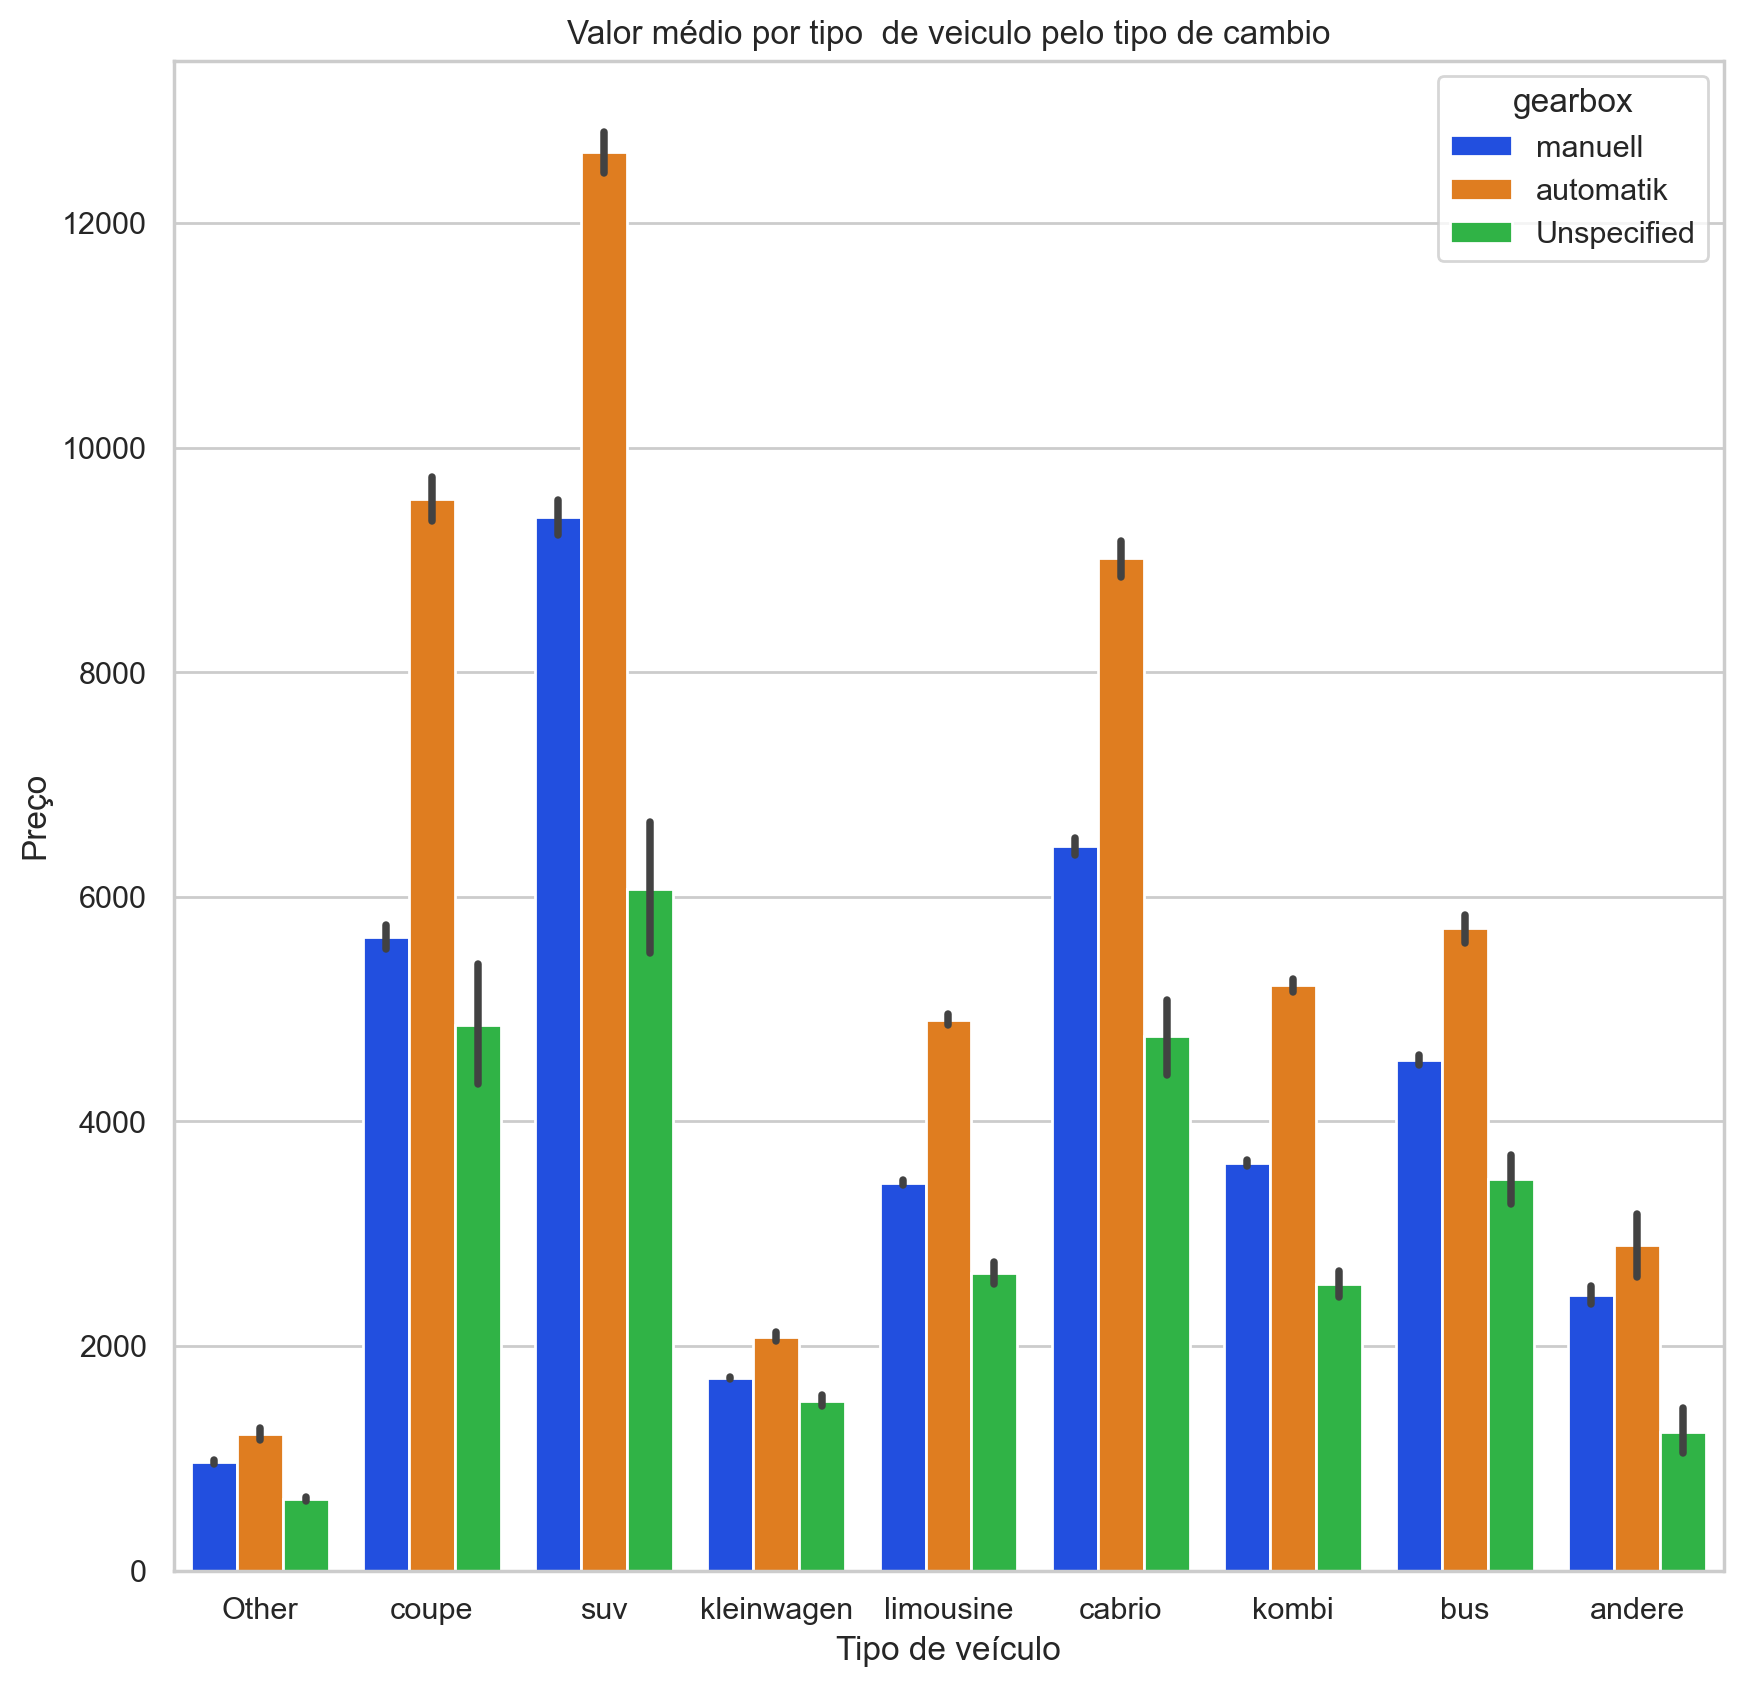

In [131]:
#Elaborando analise de predominância de cada marca
plt.figure(figsize = (10,10), dpi=200)
sns.set_style("whitegrid")
df5= sns.barplot(data=df,
                x='vehicleType',
                y='price',
                hue = 'gearbox')
df5.set_title("Valor médio por tipo  de veiculo pelo tipo de cambio")
df5.xaxis.set_label_text("Tipo de veículo")
df5.yaxis.set_label_text("Preço")


In [134]:
#capturando a imagem e salvando na mesma pasta do notebook
fig=df5.get_figure()
fig.savefig("boxplot_preço_tipo.png")

Text(0, 0.5, 'Preço Médio')

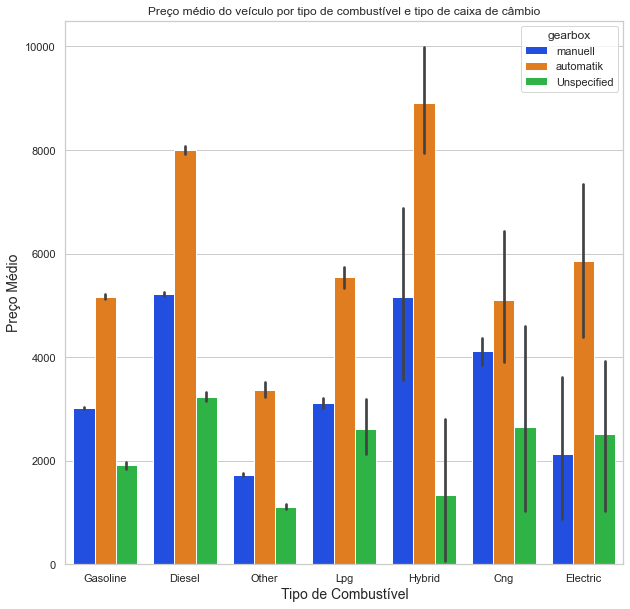

In [135]:
#Elaborando relação do preço medio pelo tipo de combustivel
fig, ax = plt.subplots(figsize=(10,10))
sns.set_style("whitegrid")
df6=sns.barplot(data=df,
               x='fuelType',
               y='price',
               hue='gearbox')
ax.set_title("Preço médio do veículo por tipo de combustível e tipo de caixa de câmbio",fontdict= {'size':12})
ax.xaxis.set_label_text("Tipo de Combustível",fontdict= {'size':14})
ax.yaxis.set_label_text("Preço Médio",fontdict= {'size':14})

In [136]:
#capturando a imagem e salvando na mesma pasta do notebook
fig=df6.get_figure()
fig.savefig("boxplot_preço_tipo.png")

In [147]:
# calcula a média de preço por marca de veiculo
trial = pd.DataFrame()
for b in list(df['brand'].unique()):
    for v in list(df['vehicleType'].unique()):
        z=df[(df['brand']==b)&(df['vehicleType']==v)]['price'].mean()
        trial=trial.append(pd.DataFrame({'brand':b, 'vehicleType':v,'avgPrice':z},index=[0]))
trial=trial.reset_index()
del trial["index"]
trial['avgPrice'].fillna(0,inplace=True)
trial['avgPrice'].isnull().value_counts()
trial["avgPrice"] = trial["avgPrice"].astype(int)
trial.head(20)

,brand,vehicleType,avgPrice
0,volkswagen,Other,897
1,volkswagen,coupe,8014
2,volkswagen,suv,13946
3,volkswagen,kleinwagen,1626
4,volkswagen,limousine,3743
5,volkswagen,cabrio,5784
6,volkswagen,kombi,3902
7,volkswagen,bus,5881
8,volkswagen,andere,2597
9,audi,Other,1012


In [148]:
dfi.export(trial.head(20), 'média de preço por marca de veiculo.png')

Text(156.453125, 0.5, 'Marca')

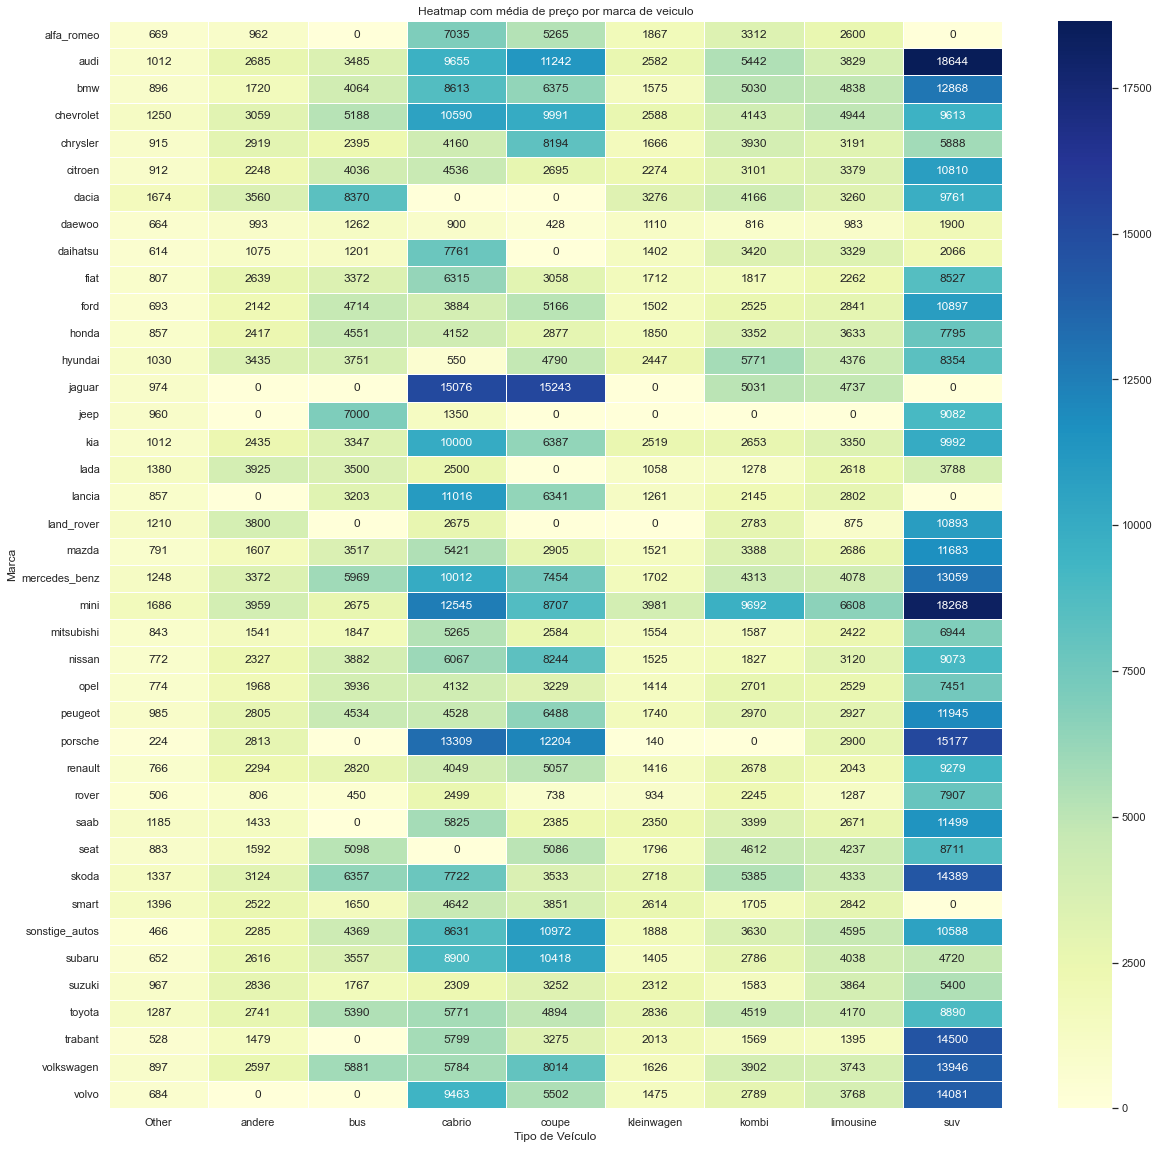

In [150]:
#Elabora um heatmap com média de preço por marca de veiculo
tri=trial.pivot("brand","vehicleType","avgPrice")
fig,ax = plt.subplots(figsize=(20,20))
df7=sns.heatmap(tri,
               linewidths=1,
               cmap="YlGnBu",
               annot=True,
               ax=ax,
               fmt='d')
ax.set_title("Heatmap com média de preço por marca de veiculo")
ax.xaxis.set_label_text("Tipo de Veículo")
ax.yaxis.set_label_text("Marca")

In [ ]:
#capturando a imagem e salvando na mesma pasta do notebook
fig=df7.get_figure()
fig.savefig("heatmap_marca_.png")